# 🧠 Task 4: Logistic Regression - Binary Classification
## Dataset: Breast Cancer Diagnosis (`data.csv`)

This notebook performs a binary classification task using **Logistic Regression** on the Breast Cancer dataset.

### Objectives:
- Understand how logistic regression works
- Train and test a classification model
- Evaluate performance using accuracy, confusion matrix, precision, recall, and ROC-AUC score

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score

### Step 1: Load Dataset and Explore

Let’s begin by loading our dataset and checking the structure and contents.

In [5]:
df = pd.read_csv("data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Step 2: Data Cleaning

- Drop unnecessary columns: `id` and `Unnamed: 32`
- Convert categorical target `diagnosis` to numeric: Malignant = 1, Benign = 0

In [8]:
df = df.drop(['id', 'Unnamed: 32'], axis=1)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

### Step 3: Split Data into Train and Test Sets

We use an 80-20 split for training and testing.

In [11]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 4: Standardize Features

Standardizing helps improve model convergence and accuracy.

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 5: Train Logistic Regression Model

We now train a logistic regression classifier using the training set.

In [17]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

### Step 6: Evaluate Model

We evaluate the model using:
- Accuracy
- Confusion Matrix
- Classification Report (Precision, Recall, F1-score)
- ROC-AUC Score

In [20]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.9736842105263158

Confusion Matrix:
 [[70  1]
 [ 2 41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


ROC-AUC Score: 0.99737962659679


### Step 7: Plot ROC Curve

Visualize how well the classifier separates the classes using ROC.

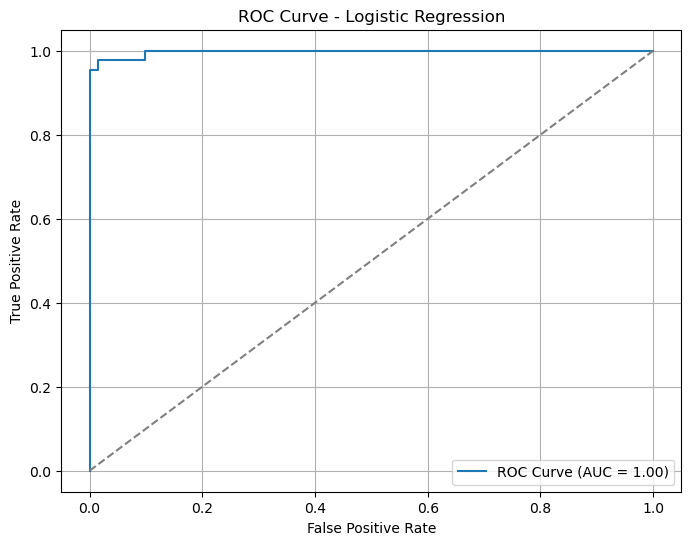

In [23]:
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

### Class Distribution

Before training, it's important to check whether our dataset is **balanced** or not. This helps avoid biased predictions.

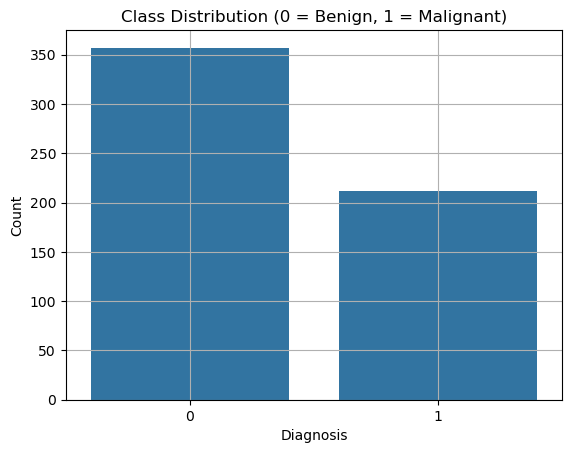

In [26]:
sns.countplot(x=y)
plt.title("Class Distribution (0 = Benign, 1 = Malignant)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.grid(True)
plt.show()

### Confusion Matrix Heatmap

This gives a better visual representation of how many true/false predictions our model made.

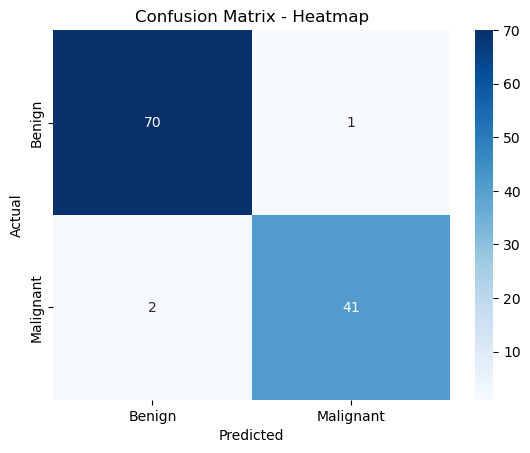

In [29]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Heatmap")
plt.show()

### Feature Importance

Logistic Regression allows us to **interpret the effect of each feature** on the prediction by examining the **model coefficients**.

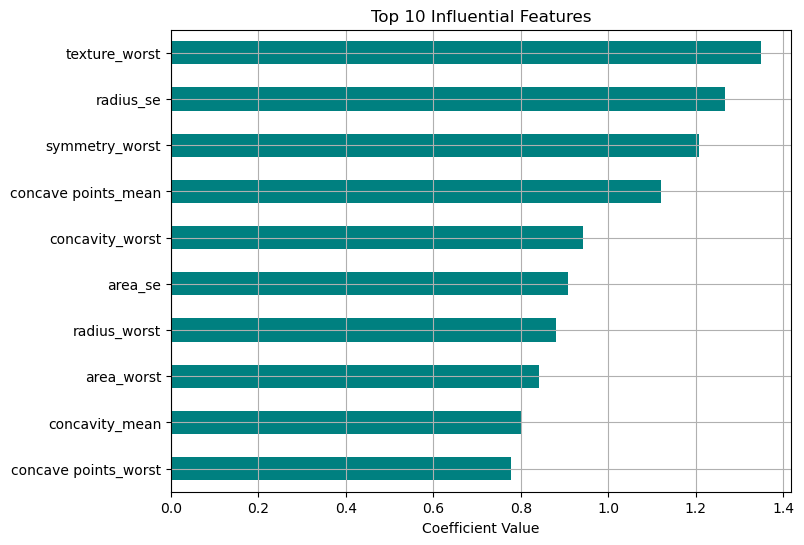

In [32]:
importance = pd.Series(model.coef_[0], index=X.columns)
top_features = importance.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,6))
top_features.plot(kind='barh', color='teal')
plt.xlabel("Coefficient Value")
plt.title("Top 10 Influential Features")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

In [38]:
import joblib
joblib.dump(model, "logistic_model.pkl") #This saves the model

['logistic_model.pkl']